In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import *
import math as m
import cmath
import time
from matplotlib import cm
import skrf as rf
from scipy.optimize import curve_fit

In [4]:
Vs=np.linspace(20,110,19)
f=np.linspace(8.16,8.36,20001)
phie=np.linspace(0,2,361)
phiem=[]
move=0
for i in range(len(phie)):
    if (phie[i]-move)<0:
        phiem.append(phie[i]-move+2)
    else:
        phiem.append(phie[i]-move)
Isose=np.loadtxt(r'E:\Nonreciprocity\20210703\m smaller than a\Isos.txt')
print(np.shape(Isole))

(19, 361)


In [ ]:
mainl1=r'E:\Nonreciprocity\20210703\m lager than a\S12\20-110\S'

mainl2=r'E:\Nonreciprocity\20210703\m lager than a\S21\20-110\S'

mains1=r'E:\Nonreciprocity\20210703\m smaller than a\S12\20-110\S'

mains2=r'E:\Nonreciprocity\20210703\m smaller than a\S21\20-110\S'

In [ ]:
s12=np.loadtxt(r'E:\Nonreciprocity\20210703\m smaller than a\S12\20-110\S\S12 of coupling(experiment) with A=50.0 mV 2D.txt',delimiter=',')
s21=np.loadtxt(r'E:\Nonreciprocity\20210703\m smaller than a\S21\20-110\S\S21 of coupling(experiment) with A=50.0 mV 2D.txt',delimiter=',')
iso=s12-s21

In [ ]:
plt.figure(figsize=(4, 4))
ax1 = plt.subplot(111)
gci1 = ax1.pcolor(phi,(f-8.248)*1e3,s12)
cbar = plt.colorbar(gci1)
plt.show()
plt.figure(figsize=(4, 4))
ax1 = plt.subplot(111)
gci1 = ax1.pcolor(phi,(f-8.248)*1e3,s21)
cbar = plt.colorbar(gci1)
plt.show()
plt.figure(figsize=(4, 4))
ax1 = plt.subplot(111)
gci1 = ax1.pcolor(phi,(f-8.248)*1e3,iso)
cbar = plt.colorbar(gci1)
plt.show()

In [ ]:


omega_a=8.246e9
omega_m=(8.246-0.029)*1e9
omega_s=np.linspace(8.21,8.23,2001)*1e9
# omega_s=np.linspace(8.2,8.24,4001)*1e9


k_int=1.4e6
k_1=45.5e6
k_2=4.5e6
k_3=1.3e6
k_c=k_int+k_1+k_2+k_3

gamma_int=1.17e6
gamma_e=1.13e6
gamma=gamma_int+gamma_e

g=8e6
phis=np.linspace(0,2,61)
deltas=np.linspace(0,10,101)
phi1s=np.linspace(0.6,1,41)
delta1s=np.linspace(0.4,1,61)
for m in range(len(phi1s)):
    phi1=phi1s[m]
    for n in range(len(delta1s)):
        delta1=delta1s[n]
        Iso=[]
        for i in range(len(phis)):
            phi=phis[i]*np.pi
            isos=[]
            for c in range(len(deltas)):
                delta=deltas[c]
                # T12=[]
                # T21=[]
                iso=[]
                isoabs=[]
                for k in range(len(omega_s)):
                    delta_m=omega_m-omega_s[k]
                    delta_a=omega_a-omega_s[k]
                    chi_a=1j*delta_a+k_c/2
                    chi_m=1j*delta_m+gamma/2
                    fenmu=chi_a*chi_m+g**2
                    
                    t12=np.sqrt(k_2)*(chi_m*(np.sqrt(k_1)+np.sqrt(k_3)*delta1*delta*np.exp(-1j*(phi1)*np.pi-1j*phi))-1j*g*np.sqrt(gamma_e)*delta*np.exp(-1j*phi))/fenmu
                    t21=np.sqrt(k_1)*(chi_m*(np.sqrt(k_2)+np.sqrt(k_3)*delta1*delta*np.exp(-1j*(phi1)*np.pi-1j*phi))-1j*g*np.sqrt(gamma_e)*delta*np.exp(-1j*phi))/fenmu
                    # t12=(chi_m*(np.sqrt(k_1*k_2))-1j*g*np.sqrt(gamma_e*k_2)*delta*np.exp(-1j*phi))/fenmu
                    # t21=(chi_m*(np.sqrt(k_1*k_2))-1j*g*np.sqrt(gamma_e*k_1)*delta*np.exp(-1j*phi))/fenmu
                    # T12.append(rf.mag_2_db(np.abs(t12)))
                    # T21.append(rf.mag_2_db(np.abs(t21)))
                    d=rf.mag_2_db(np.abs(t12))-rf.mag_2_db(np.abs(t21))
                    iso.append(d)
                    isoabs.append(np.abs(d))   
                    
                index=isoabs.index(max(isoabs))
                need=iso[index]
                # need=max(isoabs)
                isos.append(-need)
            Iso.append(isos)
            
        # -0.029
        #+0.065
        # plt.figure(figsize=(8, 4))
        # ax1 = plt.subplot(121)
        plt.figure(figsize=(4, 4))
        ax1 = plt.subplot(111)
        gci1 = ax1.pcolor(deltas,phis,Iso)
        cbar = plt.colorbar(gci1)
        plt.title(f'phi1={round(phi1,3)}pi and delta1={round(delta1,2)}')
        plt.savefig(f'E:/Nonreciprocity/20210703/m smaller than a/picture/phi1={round(phi1,3)}pi and delta1={round(delta1,2)}.png')
        plt.close()
        # ax2 = plt.subplot(122)
        # gci2 = ax2.pcolor(deltas,phie,np.transpose(Isole))
        # cbar = plt.colorbar(gci2)
    # plt.show()

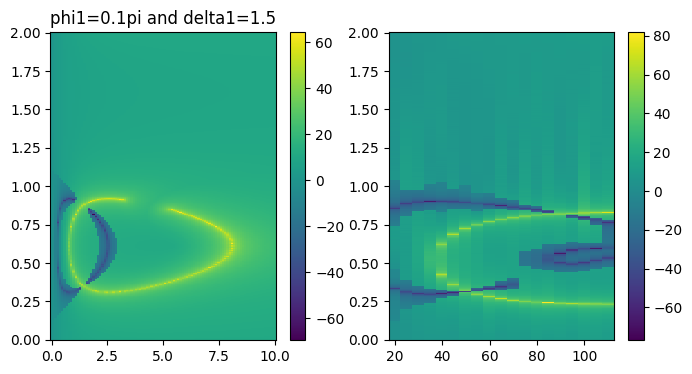

In [37]:
omega_a=8.246e9
omega_m=(8.246-0.029)*1e9
# omega_s=np.linspace(8.21,8.23,2001)*1e9
omega_s=np.linspace(8.2,8.24,401)*1e9

k_int=1.4e6
k_1=45.5e6
k_2=4.5e6
k_3=1.3e6
k_c=k_int+k_1+k_2+k_3

gamma_int=1.17e6
gamma_e=1.13e6
gamma=gamma_int+gamma_e

g=8e6
phis=np.linspace(0,2,361)
deltas=np.linspace(0,10,101)
phi1=0.1
delta1=1.5

Iso=[]
for i in range(len(phis)):
    phi=phis[i]*np.pi
    isos=[]
    for c in range(len(deltas)):
        delta=deltas[c]
        # T12=[]
        # T21=[]
        iso=[]
        isoabs=[]
        for k in range(len(omega_s)):
            delta_m=omega_m-omega_s[k]
            delta_a=omega_a-omega_s[k]
            chi_a=1j*delta_a+k_c/2
            chi_m=1j*delta_m+gamma/2
            fenmu=chi_a*chi_m+g**2
            
            t12=np.sqrt(k_2)*(chi_m*(np.sqrt(k_1)+np.sqrt(k_3)*delta1*delta*np.exp(-1j*(phi1)*np.pi-1j*phi))-1j*g*np.sqrt(gamma_e)*delta*np.exp(-1j*phi))/fenmu
            t21=np.sqrt(k_1)*(chi_m*(np.sqrt(k_2)+np.sqrt(k_3)*delta1*delta*np.exp(-1j*(phi1)*np.pi-1j*phi))-1j*g*np.sqrt(gamma_e)*delta*np.exp(-1j*phi))/fenmu
            # t12=(chi_m*(np.sqrt(k_1*k_2))-1j*g*np.sqrt(gamma_e*k_2)*delta*np.exp(-1j*phi))/fenmu
            # t21=(chi_m*(np.sqrt(k_1*k_2))-1j*g*np.sqrt(gamma_e*k_1)*delta*np.exp(-1j*phi))/fenmu
            # T12.append(rf.mag_2_db(np.abs(t12)))
            # T21.append(rf.mag_2_db(np.abs(t21)))
            
            d=rf.mag_2_db(np.abs(t12))-rf.mag_2_db(np.abs(t21))
            iso.append(d)
            isoabs.append(np.abs(d))   
            
        index=isoabs.index(max(isoabs))
        need=iso[index]
        # need=max(isoabs)
        isos.append(-need)
    Iso.append(isos)
    
# -0.029
#+0.065
plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
# plt.figure(figsize=(4, 4))
# ax1 = plt.subplot(111)
gci1 = ax1.pcolor(deltas,phis,Iso)
cbar = plt.colorbar(gci1)
plt.title(f'phi1={round(phi1,3)}pi and delta1={round(delta1,2)}')
# plt.savefig(f'E:/Nonreciprocity/20210703/m smaller than a/picture/phi1={round(phi1,3)}pi and delta1={round(delta1,2)}.png')
# plt.close()
Vs=np.linspace(20,110,19)
f=np.linspace(8.16,8.36,20001)
phie=np.linspace(0,2,361)
Isose=np.loadtxt(r'E:\Nonreciprocity\20210703\m smaller than a\Isos.txt')
ax2 = plt.subplot(122)
gci2 = ax2.pcolor(Vs,phie,np.transpose(Isose))
cbar = plt.colorbar(gci2)
plt.show()

(19, 361)


C:\Users\AORUS\AppData\Local\Temp\ipykernel_2692\882910056.py:20: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  gci2 = ax2.pcolor(Vs,phiem,np.transpose(Isose))


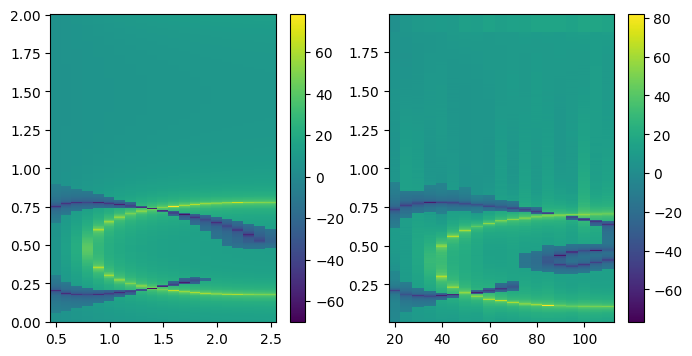

In [10]:
Vs=np.linspace(20,110,19)
f=np.linspace(8.16,8.36,20001)
phie=np.linspace(0,2,361)
phiem=[]
move=0.125
for i in range(len(phie)):
    if (phie[i]-move)<0:
        phiem.append(phie[i]-move+2)
    else:
        phiem.append(phie[i]-move)
Isose=np.loadtxt(r'E:\Nonreciprocity\20210703\m smaller than a\Isos.txt')
print(np.shape(Isose))

plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
gci1 = ax1.pcolor(deltas,phis,Iso)
cbar = plt.colorbar(gci1)

ax2 = plt.subplot(122)
gci2 = ax2.pcolor(Vs,phiem,np.transpose(Isose))
cbar = plt.colorbar(gci2)
plt.show()

In [ ]:
omega_a=8.246e9*pipi
omega_m=(8.246-0.029)*1e9*pipi
omega_s=np.linspace(8.16,8.36,201)
k_int=1.4e6*pipi
k_1=45.5e6*pipi
k_2=4.5e6*pipi
k_3=1.3e6*pipi
k_c=k_int+k_1+k_2+k_3
gamma_int=1.17e6*pipi
gamma_e=1.13e6*pipi
gamma=gamma_int+gamma_e
g=8e6*pipi
phis=np.linspace(0,1,31)*pipi
delta=1
Iso=[]
S12=[]
S21=[]
for i in range(len(phis)):
    phi=phis[i]
    T12=[]
    T21=[]
    iso=[]
    for k in range(len(omega_s)):
        delta_a=omega_a-omega_s[k]*1e9*pipi
        delta_m=omega_m-omega_s[k]*1e9*pipi
        
        t12=np.sqrt(k_2)*((1j*delta_m+gamma/2)*np.sqrt(k_1)-1j*g*np.sqrt(gamma_e)*delta*np.exp(-1j*phi))/((1j*delta_a+k_c/2)*(1j*delta_m+gamma/2)+g**2)
        t21=np.sqrt(k_1)*((1j*delta_m+gamma/2)*np.sqrt(k_2)-1j*g*np.sqrt(gamma_e)*delta*np.exp(-1j*phi))/((1j*delta_a+k_c/2)*(1j*delta_m+gamma/2)+g**2)
        T12.append(rf.mag_2_db(np.abs(t12)))
        T21.append(rf.mag_2_db(np.abs(t21)))
        iso.append(rf.mag_2_db(np.abs(t12))-rf.mag_2_db(np.abs(t21)))
    S12.append(T12)    
    S21.append(T21)
    Iso.append(iso)

In [ ]:
plt.figure(figsize=(4, 4))
ax1 = plt.subplot(111)
gci1 = ax1.pcolor(phis,(omega_s-8.248)*1e3,np.transpose(S12))
cbar = plt.colorbar(gci1)
plt.show()
plt.figure(figsize=(4, 4))
ax1 = plt.subplot(111)
gci1 = ax1.pcolor(phis,(omega_s-8.248)*1e3,np.transpose(S21))
cbar = plt.colorbar(gci1)
plt.show()
plt.figure(figsize=(4, 4))
ax1 = plt.subplot(111)
gci1 = ax1.pcolor(phis,(omega_s-8.248)*1e3,np.transpose(Iso))
cbar = plt.colorbar(gci1)
plt.show()